# **Setup**

In [60]:
import pandas as pd 
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

In [2]:
folder_input = 'Input Data'

# **Data Import**

In [3]:
municipality =  gpd.read_file(f'{folder_input}/municipality.shp')
municipality_geojson =  gpd.read_file(f'{folder_input}/municipality.geojson')

In [4]:
# No. Of Municipality Regions
len(municipality_geojson)

775

In [5]:
municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [6]:
municipality.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PROVINCE  775 non-null    int64   
 1   PR_NAME   775 non-null    object  
 2   DISTRICT  775 non-null    object  
 3   PALIKA    775 non-null    object  
 4   TYPE      775 non-null    object  
 5   geometry  775 non-null    geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 36.5+ KB


In [7]:
municipality.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
770    Polygon
771    Polygon
772    Polygon
773    Polygon
774    Polygon
Length: 775, dtype: object

## **Metadata**

In [8]:
# Get CRS
municipality.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
type(municipality)

geopandas.geodataframe.GeoDataFrame

# **Map Visualization**

<Axes: >

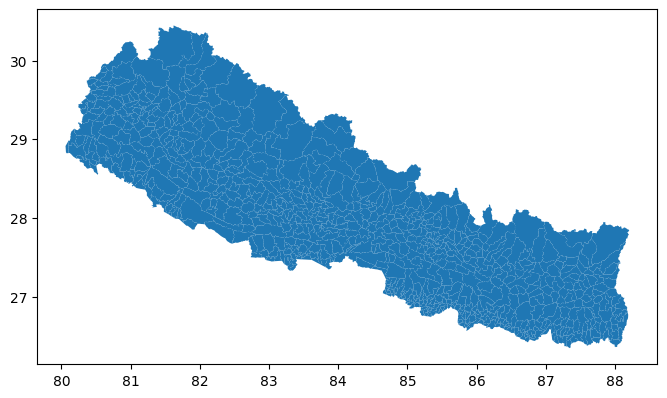

In [10]:
municipality.plot(figsize=(8,8 ))

<Axes: >

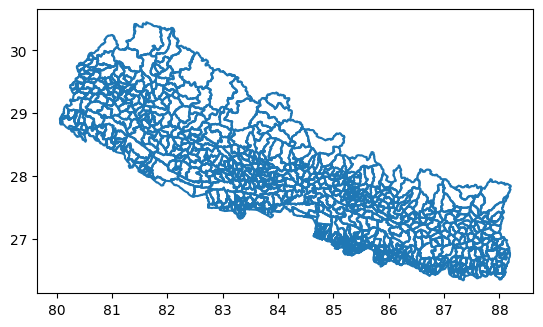

In [11]:
# Show Only Boundary
municipality.boundary.plot()

<Axes: >

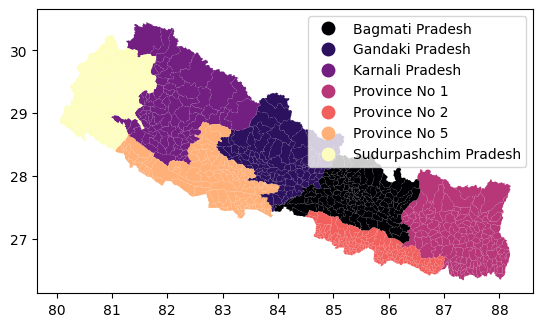

In [12]:
municipality.plot('PR_NAME',cmap='magma',legend=True)

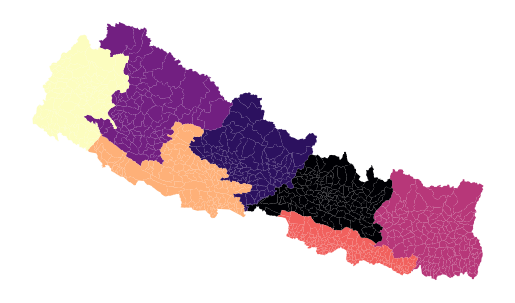

In [13]:
# Set Axis Off
map_01 = municipality.plot('PR_NAME',cmap='magma',legend=False)
map_01.set_axis_off()

## **Rupandehi District**

In [46]:
rupandehi = municipality[municipality['DISTRICT']=='RUPANDEHI']

print('No. Of Municipals: ',len(rupandehi))
print('Data Shape: ',rupandehi.shape)
rupandehi.head()

No. Of Municipals:  17
Data Shape:  (17, 7)


,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,Area
509,5,Province No 5,RUPANDEHI,Butwal,Upamahanagarpalika,"POLYGON ((83.39404 27.74746, 83.39444 27.74707...",101.878829
510,5,Province No 5,RUPANDEHI,Devdaha,Nagarpalika,"POLYGON ((83.50562 27.72572, 83.50622 27.72560...",137.290234
511,5,Province No 5,RUPANDEHI,Gaidahawa,Gaunpalika,"POLYGON ((83.32845 27.65126, 83.32876 27.65095...",97.071083
512,5,Province No 5,RUPANDEHI,Kanchan,Gaunpalika,"POLYGON ((83.26076 27.69161, 83.26059 27.68940...",58.669750
513,5,Province No 5,RUPANDEHI,Kotahimai,Gaunpalika,"POLYGON ((83.33693 27.48945, 83.33803 27.48927...",58.408883


<Axes: >

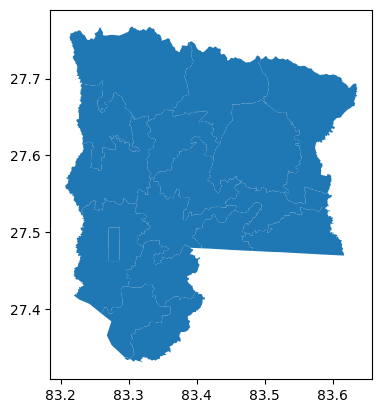

In [16]:
rupandehi.plot()

<Axes: >

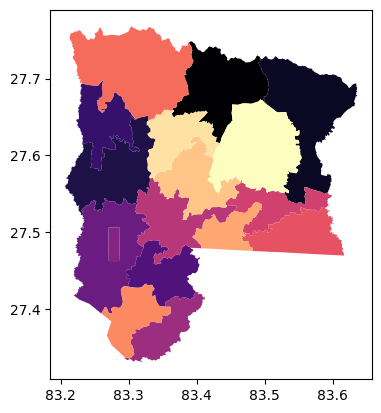

In [22]:
rupandehi.plot('PALIKA',cmap='magma')

## **Palpa District**

In [47]:
palpa = municipality[municipality['DISTRICT']=='PALPA']

print('No. Of Municipals: ',len(palpa))
print('Data Shape: ',palpa.shape)
palpa.head()

No. Of Municipals:  10
Data Shape:  (10, 7)


,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,Area
492,5,Province No 5,PALPA,Bagnaskali,Gaunpalika,"POLYGON ((83.57804 27.93438, 83.57730 27.93346...",84.365058
493,5,Province No 5,PALPA,Mathagadhi,Gaunpalika,"POLYGON ((83.64819 27.87138, 83.64852 27.87120...",215.983972
494,5,Province No 5,PALPA,Nisdi,Gaunpalika,"POLYGON ((84.02717 27.85081, 84.02673 27.85023...",194.882576
495,5,Province No 5,PALPA,Purbakhola,Gaunpalika,"POLYGON ((83.73864 27.88954, 83.73903 27.88936...",138.337975
496,5,Province No 5,PALPA,Rainadevi Chhahara,Gaunpalika,"POLYGON ((83.38043 27.95803, 83.38030 27.95774...",176.373342


<Axes: >

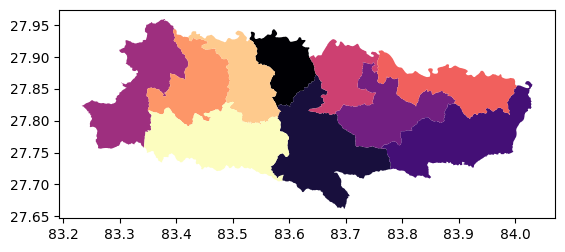

In [48]:
palpa.plot('PALIKA',cmap='magma')

## **Combine Regions In A Single Map**

<Axes: >

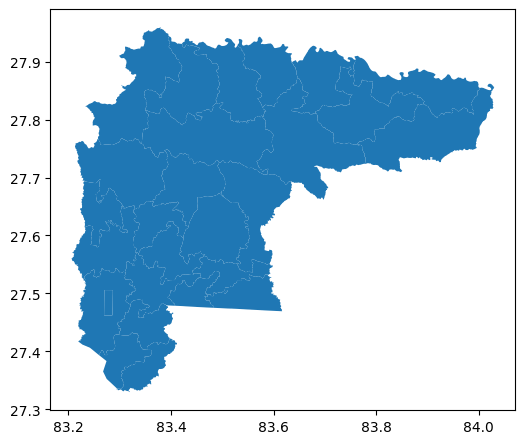

In [53]:
map_02 = rupandehi.plot(figsize=(6,6))
palpa.plot(ax=map_02)

# **Add Area Column**

In [25]:
print(municipality.shape,'\n')
municipality.head()

(775, 6) 



,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [29]:
municipality['Area'] = municipality['geometry'].to_crs(epsg=32645).area/(10**6)

municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,Area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943...",88.521700
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831...",137.371061
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768...",209.626709
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000...",441.435863
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119...",1851.420797


<Axes: >

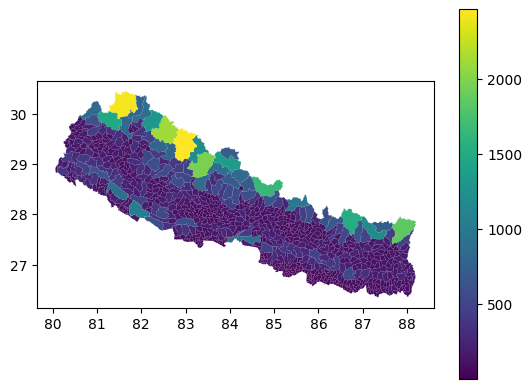

In [30]:
municipality.plot('Area',legend=True)

# **Working With Geometry**

In [32]:
import shapely
from shapely.geometry import Point,LineString, Polygon

## **Create A Point**

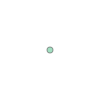

In [34]:
# Create A Point
Point_01 = Point(1,1)
Point_01

## **Create A Line**

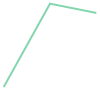

In [35]:
# Create A Line
Line_01 = LineString([(0,0),(5,9),(10,8)])
Line_01

## **Create A Polygon**

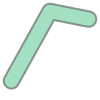

In [36]:
# Create A Polygon
Polygon_01 = Line_01.buffer(1)
Polygon_01

## **Check Spatial Relationship**

Relationship Types
* Contains
* Touches
* Overlap

In [38]:
# Check If Point_01 Is Contained Inside Polygon_01
Point_01.within(Polygon_01)

True

In [39]:
# Check If Polygon_01 Contains Point_01
Polygon_01.contains(Point_01 )

True

## **Create Geo Series**

In [43]:
Geo_Series_01 = gpd.GeoSeries([Point(-10,15),Point(10,2),Point(-5,16)])

print(type(Geo_Series_01))
Geo_Series_01

<class 'geopandas.geoseries.GeoSeries'>


0    POINT (-10.00000 15.00000)
1      POINT (10.00000 2.00000)
2     POINT (-5.00000 16.00000)
dtype: geometry

<Axes: >

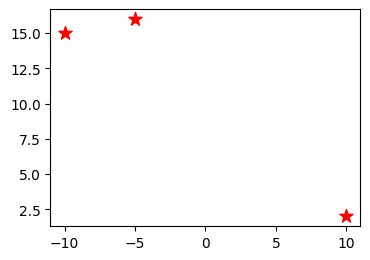

In [44]:
Geo_Series_01.plot(marker='*',color='red',markersize=100,figsize=(4,4))

# **Conditional Plotting**

* Plot All Municipalities With Area > 50 Sq. Km

<Axes: >

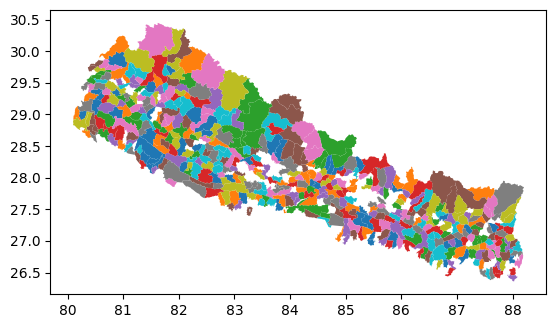

In [58]:
municipality[municipality['Area']>100].plot('PALIKA',legend=False)

# **Folium Dynamic Maps**

In [ ]:
!pip install folium
!pip install mapclassify
clear_output()

In [63]:
import mapclassify
import folium
import matplotlib

## **Rupandehi District Map**

In [64]:
rupandehi.explore()

In [69]:
rupandehi.explore(column='PALIKA')